
**Cortical folding scales universally with surface area and thickness, not number of neurons, Science 349 (6243), 74-77**

Main analysis and graphs

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Mota & Herculano-Houzel 2015 Public dataset
data = pd.read_excel('public_data/dados_Bruno_etal_Science_UniversalScaling.xlsx')
data['Ae (mm²)'] = data['At (mm²)']/data['FI']


# 1. Folding Index and cortical thickness

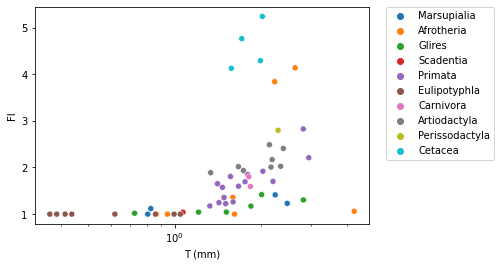

In [3]:
ax = sns.scatterplot(x = 'T (mm)', y = 'FI', hue = 'clade', data = data)
ax.set(xscale="log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 2. Folding Index and Total Area

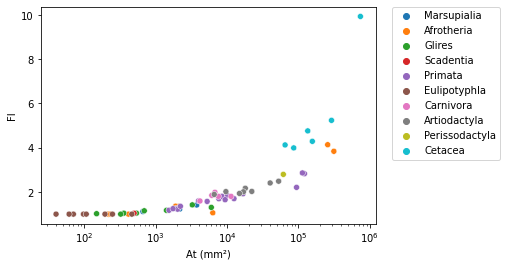

In [4]:
ax = sns.scatterplot(x = 'At (mm²)', y = 'FI', hue = 'clade', data = data)
ax.set(xscale="log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 3. Folding Index and Exposed Area

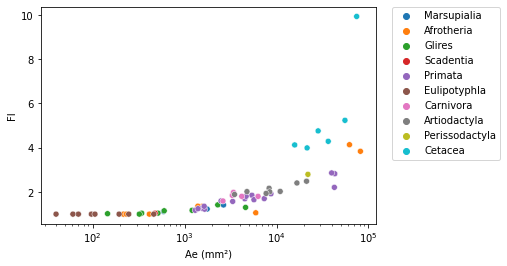

In [5]:
ax = sns.scatterplot(x = 'Ae (mm²)', y = 'FI', hue = 'clade', data = data)
ax.set(xscale="log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 4. Total Area and Exposed Area

Obviously will not return a universal rule! Two different rules: lisencefalic and gyrencephalic mammals

alpha =  1.291799019605954 +- 0.022127904013681608
beta =  -0.8024565842746951
r² =  0.9927442244458835
p-value =  1.139485737721381e-47


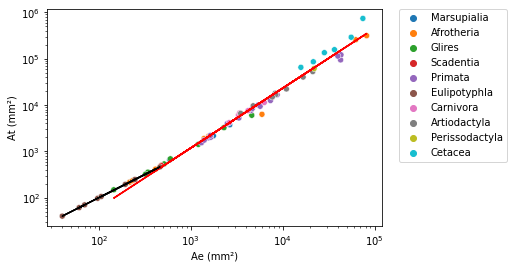

In [6]:
ax = sns.scatterplot(x = 'Ae (mm²)', y = 'At (mm²)', hue = 'clade', data = data)
ax.set(xscale="log")
ax.set(yscale="log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# fit a rule for FI > 1
condition = (data['FI'] > 1)
x = np.log10(data[condition]['Ae (mm²)'].to_numpy())
y = np.log10(data[condition]['At (mm²)'].to_numpy())
res = stats.linregress(x, y)
print('alpha = ', res.slope, "+-", res.stderr)
print('beta = ', res.intercept)
print('r² = ', res.rvalue)
print('p-value = ', res.pvalue)

plt.plot(data[condition]['Ae (mm²)'].to_numpy(), 10**(res.intercept+res.slope*x), 'r')

# lisencefalic mammals
condition = (data['FI'] == 1)
plt.plot(data[condition]['Ae (mm²)'].to_numpy(),data[condition]['Ae (mm²)'].to_numpy(), 'black', label='Lisencefalic')




# **Cortical folding scales universally with surface area and thickness**

For a self-avoiding crumpled surface, one expects a relation between the mean thickness $T$, total ($A_t$) and exposed area ($A_e$)

$$ T^{1/2} A_t = k A_{e}^{\alpha}$$

with $\alpha_{\text{teo}} = 5/4$. Finding that the cortex follows this relation with the index $\alpha$ very close to the value expected for about $\sim 50$ different mammals from different clades:

1. Imposes physical restrictions on a possible real cortex.

2. Suggests that the cortex is an elastic self-avoiding crumpled surface in thermodynamical equilibrium. The white matter has to produce work while expanding against the cerebrospinal fluid subjected to the restriction of not intersect itself.

3. Suggests that the cortex is a fractal object (power-law relation).

4. Implies that the usual morphological variables $\{T, A_t,A_e\}$ used to describe the cortex morphology are correlated.


alpha =  1.3246977745855224 +- 0.00929200585999219
beta =  -0.8029164688160972
r² =  0.9986496769532582
p-value =  2.4414386566653756e-72


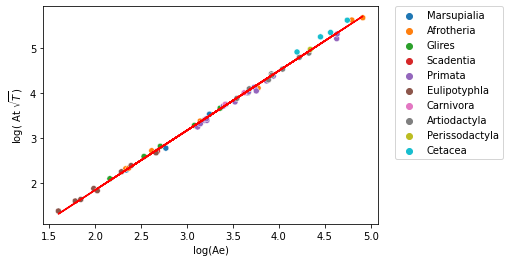

In [7]:
data['x'] = np.log10(data['Ae (mm²)'])
data['y'] = np.log10(data['At (mm²)']*np.sqrt(data['T (mm)']))

data.dropna(inplace=True)

figplot = sns.scatterplot(x = 'x', y = 'y', hue = 'clade', data = data)
figplot.set_xlabel('log(Ae)')
figplot.set_ylabel(r'log( At $\sqrt{T}$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Fit Universal rule
x = data['x']
y = data['y']
res = stats.linregress(x, y)
print('alpha = ', res.slope, "+-", res.stderr)
print('beta = ', res.intercept)
print('r² = ', res.rvalue)
print('p-value = ', res.pvalue)

plt.plot(x, res.intercept+res.slope*x, 'r')

**Simulation:** Experimental errors may affect the measurement of $\alpha$. Here we are dealing with an heterogeneous (different acquisition protocol) dataset.

$$\alpha_{\text{sim}} = 1.25$$
$$\alpha_{\text{exp}} \sim 1.32$$

alpha =  1.3163975850158078 +- 0.008475985964514307
beta =  -0.8403895201685172
r² =  0.998861856372984
p-value =  2.2243743327461182e-74


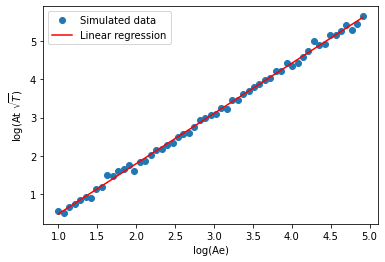

In [8]:
xsim = np.linspace(1,max(x),len(x))

# error proportional to the value of the total area
ysim = np.random.normal(1.25*xsim + res.intercept, 0.08) + (1.25*xsim + res.intercept)*0.05
ressim = stats.linregress(xsim, ysim)

print('alpha = ', ressim.slope, "+-", ressim.stderr)
print('beta = ', ressim.intercept)
print('r² = ', ressim.rvalue)
print('p-value = ', ressim.pvalue)

plt.plot(xsim, ysim, 'o', label='Simulated data')
plt.plot(xsim, ressim.intercept + ressim.slope*xsim, 'r', label='Linear regression')
plt.xlabel('log(Ae)')
plt.ylabel(r'log(At $\sqrt{T}$)')
plt.legend()
plt.show()

**Restrictions of a physically feasible cortical surface**

The power-law relation $T^{1/2} A_t = k A_{e}^{5/4}$ implies that, in log-scale, the cortex will lie on a plane in $\{log(T^2), log(A_t), log(A_e) \}$ space:

$$ K \equiv log(k) = \frac{1}{4}log(T^2) + log(A_t) - \frac{5}{4}log(A_e)$$

Text(0.5, 0, 'log($A_e$)')

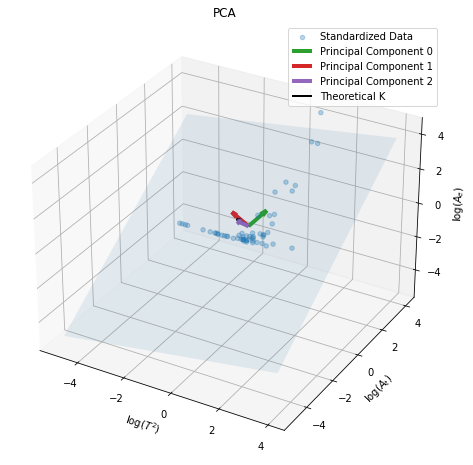

In [9]:
# uncomment the line below in order to play with the graph
#%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

# dataset to perform PCA
data["logT2"] = 2*np.log10(data["T (mm)"])
df = data[["logT2","At (mm²)", "Ae (mm²)"]].reset_index(drop=True).copy()

# PCA
X = df.values[:,:]
X = np.nan_to_num(X)
dataset = StandardScaler().fit_transform(X)
pca = PCA(n_components=3).fit(dataset)

# 3D plot with the plane
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], alpha=0.3, label="Standardized Data")

for i, comp in enumerate(pca.components_):
    ax.quiver(0,0,0, comp[0],comp[1],comp[2],label=f"Principal Component {i}",linewidth=4, color=f"C{i + 2}")

# Theoretical minimum variance direction K (normalized)
Karr = np.array([-1/4,-1,1.25])/np.sqrt((1/4)**2 + 1 + 1.25**2)
ax.quiver(0,0,0, Karr[0],Karr[1],Karr[2], label=f"Theoretical K",linewidth=2, color="Black")

# Plane
point  = np.array([1, 1, 1])
normal = Karr
d = -point.dot(normal)
xx, yy = np.meshgrid(np.arange(-5,5,1), range(-5,5,1))
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.1)

ax.legend()
plt.title('PCA')
ax.set_xlabel(f"log($T^2$)")
ax.set_ylabel(f"log($A_t$)")
ax.set_zlabel(f"log($A_e$)")


Explained variance ratio: The K direction

In [10]:
# the third component
pca.explained_variance_ratio_

array([0.73976723, 0.2515049 , 0.00872787])

In [11]:
M = pca.components_

print("Mismatch in the Theoretical Direction of K = ",180*np.arccos(np.dot(M[2],Karr))/np.pi, "degrees") 

Mismatch in the Theoretical Direction of K =  6.5743152454085 degrees
